<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0417_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 다중선형회귀 예제

Iris data를 활용하여 sepal length, sepal width, petal length의 변화에 따른 petal width 구하기!!!

In [0]:
#필요한 라이브러리 불러오기 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris()

In [2]:
torch.manual_seed(1)

데이터 불러오기

In [3]:
# 데이터프레임형식으로 변환
df=pd.DataFrame(data=df['data'],columns=df['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
standard_df=df
standard_df=standard_df.apply(lambda x: (x-x.mean())/x.std())
standard_df['petal width (cm)']=df['petal width (cm)']
standard_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,0.2
1,-1.139200,-0.131539,-1.335752,0.2
2,-1.380727,0.327318,-1.392399,0.2
3,-1.501490,0.097889,-1.279104,0.2
4,-1.018437,1.245030,-1.335752,0.2
...,...,...,...,...
145,1.034539,-0.131539,0.816859,2.3
146,0.551486,-1.278680,0.703564,1.9
147,0.793012,-0.131539,0.816859,2.0
148,0.430722,0.786174,0.930154,2.3


In [5]:
#150 x 4라는 아주 작은 데이터셋 
#x는 모든행을 불러오고 마지막 petal width를 제외하고 불러오고, y는 모든행을 가진 petal width열만
x,y=standard_df.values[:,:-1],standard_df.values[:,-1:]
x.shape, y.shape

((150, 3), (150, 1))

커스텀 데이터셋 만들기

In [0]:
#커스텀 데이터셋을 만드는 가장 기본적인 뼈대

class Iris():
    def __init__(self):
        self.x_data = torch.FloatTensor(x)
        self.y_data = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.x_data)
  
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y


In [7]:
#만약 CLASS로만 구현하고자 한다면

'''class MultiLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(3,1)

    def forward(self,x):
        return self.linear(x)

model=MultiLinearRegression()

optimizer = optim.SGD(model.parameters(), lr=1e-5)


nb_epochs=2000
train_losses=[]
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
             ))'''

"class MultiLinearRegression(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.linear=nn.Linear(3,1)\n\n    def forward(self,x):\n        return self.linear(x)\n\nmodel=MultiLinearRegression()\n\noptimizer = optim.SGD(model.parameters(), lr=1e-5)\n\n\nnb_epochs=2000\ntrain_losses=[]\nfor epoch in range(nb_epochs+1):\n    for batch_idx, samples in enumerate(dataloader):\n        x_train, y_train = samples\n        \n\n        prediction = model(x_train)\n        cost = F.mse_loss(prediction, y_train)\n\n\n\n        optimizer.zero_grad()\n        cost.backward()\n        optimizer.step()\n        train_losses.append(cost.item())\n\n\n        if epoch % 100 == 0:\n            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(\n            epoch, nb_epochs, batch_idx+1, len(dataloader),\n            cost.item()\n             ))"

In [8]:
dataset=Iris()

#train /test data나누기

train_test_ratio=0.8
train_size=int(len(dataset)*train_test_ratio)
test_size=len(dataset)-train_size


train_dataset, test_dataset = torch.utils.data.random_split(dataset,[train_size,test_size])
print(len(train_dataset), len(test_dataset))

#train 120개 test 30개

120 30


In [9]:
len(dataset),dataset[0]  #총 샘플의수 150개 0번째 샘플의 x는 [-0.897674,	1.015602,	-1.335752] ,	0.2

(150, (tensor([-0.8977,  1.0156, -1.3358]), tensor([0.2000])))

In [0]:
train_dataloader=DataLoader(dataset=train_dataset,batch_size=len(dataset)) 
test_dataloader=DataLoader(dataset=test_dataset,batch_size=len(dataset)) 

모델 학습하기

In [11]:
model = nn.Linear(3,1)      #input 3 ouput 1
print(list(model.parameters())) #초기화된 w,b값 확인
optimizer = optim.SGD(model.parameters(), lr=1e-5)

[Parameter containing:
tensor([[ 0.3888, -0.1955,  0.5641]], requires_grad=True), Parameter containing:
tensor([-0.0667], requires_grad=True)]


In [12]:
nb_epochs=2000
train_losses=[]

for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(train_dataloader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Train Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(train_dataloader),
            cost.item()
             ))

Epoch    0/2000 Batch 1/1 Train Cost: 1.781373
Epoch  100/2000 Batch 1/1 Train Cost: 1.774174
Epoch  200/2000 Batch 1/1 Train Cost: 1.767006
Epoch  300/2000 Batch 1/1 Train Cost: 1.759870
Epoch  400/2000 Batch 1/1 Train Cost: 1.752765
Epoch  500/2000 Batch 1/1 Train Cost: 1.745691
Epoch  600/2000 Batch 1/1 Train Cost: 1.738648
Epoch  700/2000 Batch 1/1 Train Cost: 1.731636
Epoch  800/2000 Batch 1/1 Train Cost: 1.724653
Epoch  900/2000 Batch 1/1 Train Cost: 1.717703
Epoch 1000/2000 Batch 1/1 Train Cost: 1.710782
Epoch 1100/2000 Batch 1/1 Train Cost: 1.703891
Epoch 1200/2000 Batch 1/1 Train Cost: 1.697031
Epoch 1300/2000 Batch 1/1 Train Cost: 1.690199
Epoch 1400/2000 Batch 1/1 Train Cost: 1.683398
Epoch 1500/2000 Batch 1/1 Train Cost: 1.676627
Epoch 1600/2000 Batch 1/1 Train Cost: 1.669884
Epoch 1700/2000 Batch 1/1 Train Cost: 1.663172
Epoch 1800/2000 Batch 1/1 Train Cost: 1.656489
Epoch 1900/2000 Batch 1/1 Train Cost: 1.649834
Epoch 2000/2000 Batch 1/1 Train Cost: 1.643209


In [13]:
print(list(model.parameters())) #학습후 w와 b의 값 확인

[Parameter containing:
tensor([[ 0.3787, -0.1865,  0.5551]], requires_grad=True), Parameter containing:
tensor([-0.0167], requires_grad=True)]


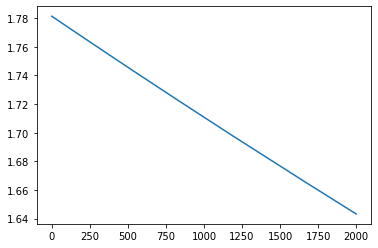

In [14]:
#epoch에 따른 train_losses 변화

plt.plot(train_losses)
plt.show()

테스트하기

In [15]:
#테스트 하는 것이므로 torch.no_grad()구간 안에 있어야함.

test_losses=[]
with torch.no_grad():

    for batch_idx, samples in enumerate(test_dataloader):
        x_test, y_test = samples
        prediction = model(x_test)
        cost = F.mse_loss(prediction, y_test)
        test_losses.append(cost.item())

test_losses

[1.5568422079086304]

In [16]:
new_var=torch.FloatTensor([[-0.897674,1.015602,-1.335752	]]) #petal width가 0.2인 0번째 인덱스의 x값(정규화된)을 넣어봄
pred_y=model(new_var)

print('훈련 후 입력이 -0.897674,1.015602,-1.335752	 일때의 예측값: ', pred_y)
#0.2인데 -1.28이라 예측함 test오차만큼......

훈련 후 입력이 -0.897674,1.015602,-1.335752	 일때의 예측값:  tensor([[-1.2875]], grad_fn=<AddmmBackward>)
